<a href="https://colab.research.google.com/github/kplr-training/Data-Preparation/blob/main/1-D%C3%A9buter%20avec%20Pandas/Workshop/1_Debuter_avec_pandas_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Débuter avec pandas**
- Nous commencerons par présenter les classes Series, DataFrame et Index, qui sont les éléments de base de la bibliothèque pandas, et montrerons comment les utiliser.
- À la fin de cette section, vous serez en mesure de créer des DataFrames et d'y effectuer des opérations pour inspecter et filtrer les données.

# **Anatomy of a DataFrame**

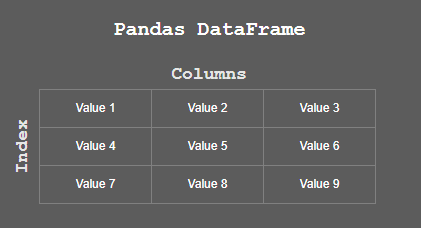

- Un DataFrame est composé d'une ou plusieurs Series. Les noms des séries forment les noms des colonnes et les étiquettes des lignes forment l'index.

In [ ]:
import pandas as pd

meteorites = pd.read_csv('/content/Meteorite_Landings.csv', nrows=5)
meteorites

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


**Series**

In [ ]:
meteorites.name

0      Aachen
1      Aarhus
2        Abee
3    Acapulco
4     Achiras
Name: name, dtype: object

**Columns:**

In [ ]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

**Index:**

In [ ]:
meteorites.index

RangeIndex(start=0, stop=5, step=1)

**Creating DataFrames**
- We can create DataFrames from a variety of sources such as other Python objects, flat files, webscraping, and API requests.
- Here, we will see just a couple of examples, but be sure to check out this page in the documentation for a complete list.

**Using a flat file**

In [ ]:
import pandas as pd

meteorites = pd.read_csv('/content/Meteorite_Landings.csv')

**Using data from an API**
- Collect the data from NASA's Open Data Portal using the Socrata Open Data API (SODA) with the requests library:

In [ ]:
import requests

response = requests.get(
    'https://data.nasa.gov/resource/gh4g-9sfh.json',
    params={'$limit': 50_000}
)

if response.ok:
    payload = response.json()
else:
    print(f'Request was not successful and returned code: {response.status_code}.')
    payload = None

In [ ]:
df = pd.DataFrame(payload)
df.head(3)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'latitude': '50.775', 'longitude': '6.08333'}",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'latitude': '56.18333', 'longitude': '10.23333'}",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'latitude': '54.21667', 'longitude': '-113.0'}",NaN,NaN


**Inspecting the data**
- Now that we have some data, we need to perform an initial inspection of it. 
- This gives us information on what the data looks like, how many rows/columns there are, and how much data we have.

- Let's inspect the meteorites data.

**How many rows and columns are there?**

In [ ]:
meteorites.shape

(45716, 10)

**What are the column names?**

In [ ]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

**What type of data does each column currently hold?**

In [ ]:
meteorites.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year            object
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

**What does the data look like?**

In [ ]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


- Sometimes there may be extraneous data at the end of the file, so checking the bottom few rows is also important:

In [ ]:
meteorites.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,01/01/1976 12:00:00 AM,33.98333,-115.68333,"(33.98333, -115.68333)"


**Get some information about the DataFrame**

In [ ]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


**Exercise 1.1**
- Create a DataFrame by reading in the 2019_Yellow_Taxi_Trip_Data.csv file.
- Examine the first 5 rows.

In [ ]:
#solution

Double-click __here__ for the solution.

<!-- Your answer is below:
taxis = pd.read_csv('/content/2019_Yellow_Taxi_Trip_Data.csv')
taxis.head()

-->

**Exercise 1.2**
- Find the dimensions (number of rows and number of columns) in the data.

In [ ]:
#solution

Double-click __here__ for the solution.

<!-- Your answer is below:
taxis.shape
-->

# **Extracting subsets**
- A crucial part of working with DataFrames is extracting subsets of the data: finding rows that meet a certain set of criteria, isolating columns/rows of interest, etc. 
- After narrowing down our data, we are closer to discovering insights. 
- This section will be the backbone of many analysis tasks.

**Selecting columns**
- We can select columns as attributes if their names would be valid Python variables:

In [ ]:
meteorites[['name', 'mass (g)']]

,name,mass (g)
0,Aachen,21.0
1,Aarhus,720.0
2,Abee,107000.0
3,Acapulco,1914.0
4,Achiras,780.0
...,...,...
45711,Zillah 002,172.0
45712,Zinder,46.0
45713,Zlin,3.3
45714,Zubkovsky,2167.0


**Selecting rows**


In [ ]:
meteorites[100:104]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
100,Benton,5026,Valid,LL6,2840.0,Fell,01/01/1949 12:00:00 AM,45.95000,-67.55000,"(45.95, -67.55)"
101,Berduc,48975,Valid,L6,270.0,Fell,01/01/2008 12:00:00 AM,-31.91000,-58.32833,"(-31.91, -58.32833)"
102,Béréba,5028,Valid,Eucrite-mmict,18000.0,Fell,01/01/1924 12:00:00 AM,11.65000,-3.65000,"(11.65, -3.65)"
103,Berlanguillas,5029,Valid,L6,1440.0,Fell,01/01/1811 12:00:00 AM,41.68333,-3.80000,"(41.68333, -3.8)"


**Indexing**
- We use iloc[] to select rows and columns by their position:

In [ ]:
meteorites.iloc[100:104, [0, 3, 4, 6]]

,name,recclass,mass (g),year
100,Benton,LL6,2840.0,01/01/1949 12:00:00 AM
101,Berduc,L6,270.0,01/01/2008 12:00:00 AM
102,Béréba,Eucrite-mmict,18000.0,01/01/1924 12:00:00 AM
103,Berlanguillas,L6,1440.0,01/01/1811 12:00:00 AM


**We use loc[] to select by name:**

In [ ]:
meteorites.loc[100:104, 'mass (g)':'year']

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM
104,960.0,Fell,01/01/2004 12:00:00 AM


**Filtering with Boolean masks**
- A Boolean mask is a array-like structure of Boolean values – it's a way to specify which rows/columns we want to select (True) and which we don't (False).

- Here's an example of a Boolean mask for meteorites weighing more than 50 grams that were found on Earth (i.e., they were not observed falling):

In [ ]:
(meteorites['mass (g)'] > 50) & (meteorites.fall == 'Found')

0        False
1        False
2        False
3        False
4        False
         ...  
45711     True
45712    False
45713    False
45714     True
45715     True
Length: 45716, dtype: bool

- **Important:**Take note of the syntax here. We surround each condition with parentheses, and we use bitwise operators (&, |, ~) instead of logical operators (and, or, not).

**Exercice 1.3 :**    
-  use a Boolean mask to select the subset of meteorites weighing more than 1 million grams (1,000 kilograms or roughly 2,205 pounds) that were observed falling.

In [ ]:
#solution

Double-click __here__ for the solution.

<!-- Your answer is below:
meteorites[(meteorites['mass (g)'] > 1e6) & (meteorites.fall == 'Fell')]
-->

- An alternative to this is the query() method:

In [ ]:
meteorites.query("`mass (g)` > 1e6 and fall == 'Fell'")

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
29,Allende,2278,Valid,CV3,2000000.0,Fell,01/01/1969 12:00:00 AM,26.96667,-105.31667,"(26.96667, -105.31667)"
419,Jilin,12171,Valid,H5,4000000.0,Fell,01/01/1976 12:00:00 AM,44.05000,126.16667,"(44.05, 126.16667)"
506,Kunya-Urgench,12379,Valid,H5,1100000.0,Fell,01/01/1998 12:00:00 AM,42.25000,59.20000,"(42.25, 59.2)"
707,Norton County,17922,Valid,Aubrite,1100000.0,Fell,01/01/1948 12:00:00 AM,39.68333,-99.86667,"(39.68333, -99.86667)"
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,01/01/1947 12:00:00 AM,46.16000,134.65333,"(46.16, 134.65333)"
